In [1]:
import torch
from torch import nn
from torch.nn import MSELoss, CrossEntropyLoss, BCEWithLogitsLoss
import torch.optim as optim
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

class VGG16(nn.Module):
    def __init__(self, num_classes=10):
        super(VGG16, self).__init__()
        self.num_classes = num_classes
        self.model = nn.Sequential(

            #Conv Block 1
            nn.Conv2d(3, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            ## Conv Block 2
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            ## Conv Block 3
            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            ## Conv Block 4
            nn.Conv2d(256, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            ## Conv Block 5
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )

        self.classifier = nn.Sequential(
            nn.Linear(512, 4096),
            nn.ReLU(True),
            nn.Dropout(p=0.65), #Dropout layer with p=0.65
            nn.Linear(4096, 4096),
            nn.ReLU(True),
            nn.Dropout(p=0.65),
            nn.Linear(4096, self.num_classes)
        )

    def forward(self,x):
        x = self.model(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x

In [2]:
import torchvision
from torch.utils.data import DataLoader
import torch
import torch.nn as nn
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

train_dataloader = DataLoader(trainset, batch_size=64, shuffle=True)

##Model Loss Optimizer
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = VGG16(num_classes=10).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
num_epochs = 10

100%|██████████| 170M/170M [00:06<00:00, 27.7MB/s]


In [4]:
print(device)

cuda


Epoch 1/10, Loss: 2.3049
Epoch 2/10, Loss: 2.3040
Epoch 3/10, Loss: 2.3037
Epoch 4/10, Loss: 2.3030
Epoch 5/10, Loss: 2.3029
Epoch 6/10, Loss: 2.3031
Epoch 7/10, Loss: 2.3031
Epoch 8/10, Loss: 2.3028
Epoch 9/10, Loss: 2.3027
Epoch 10/10, Loss: 2.3027


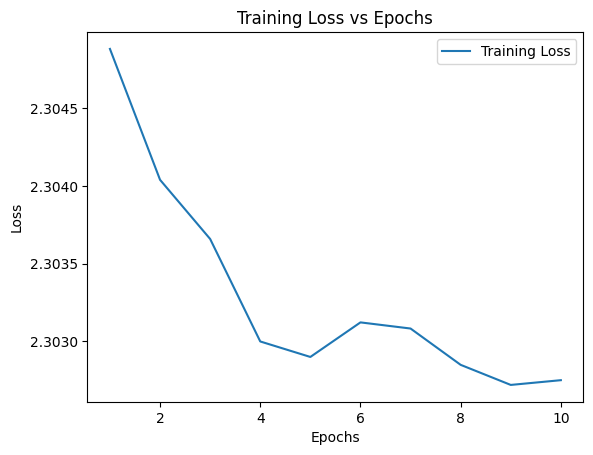

In [3]:
train_losss = []

for epoch in range(1, num_epochs + 1):
    running_loss = 0.0
    for i, (inputs, labels) in enumerate(train_dataloader):
        inputs, labels = inputs.to(device), labels.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    avg_loss = running_loss / len(train_dataloader)
    train_losss.append(avg_loss)
    print(f"Epoch {epoch}/{num_epochs}, Loss: {avg_loss:.4f}")

# Plotting the training loss
plt.plot(range(1, num_epochs + 1), train_losss, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss vs Epochs')
plt.legend()
plt.show()
